In [55]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
mobiles = pd.read_csv('mobiles1.csv')
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


In [56]:
mobiles.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [57]:
mobiles.isnull().sum()

battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        13
reviews       13
warranty     148
dtype: int64

In [66]:
v_count = mobiles['warranty'].value_counts()
mask = mobiles['warranty'].isin(v_count.nlargest(10).index)
filtered_mobiles = mobiles[mask]
filtered_mobiles.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot
5,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Black, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot
6,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Black, 32 GB)",6999,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"67,674 Reviews",Dual Nano SIM slots and Memory Card Slot
7,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Sapphire, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


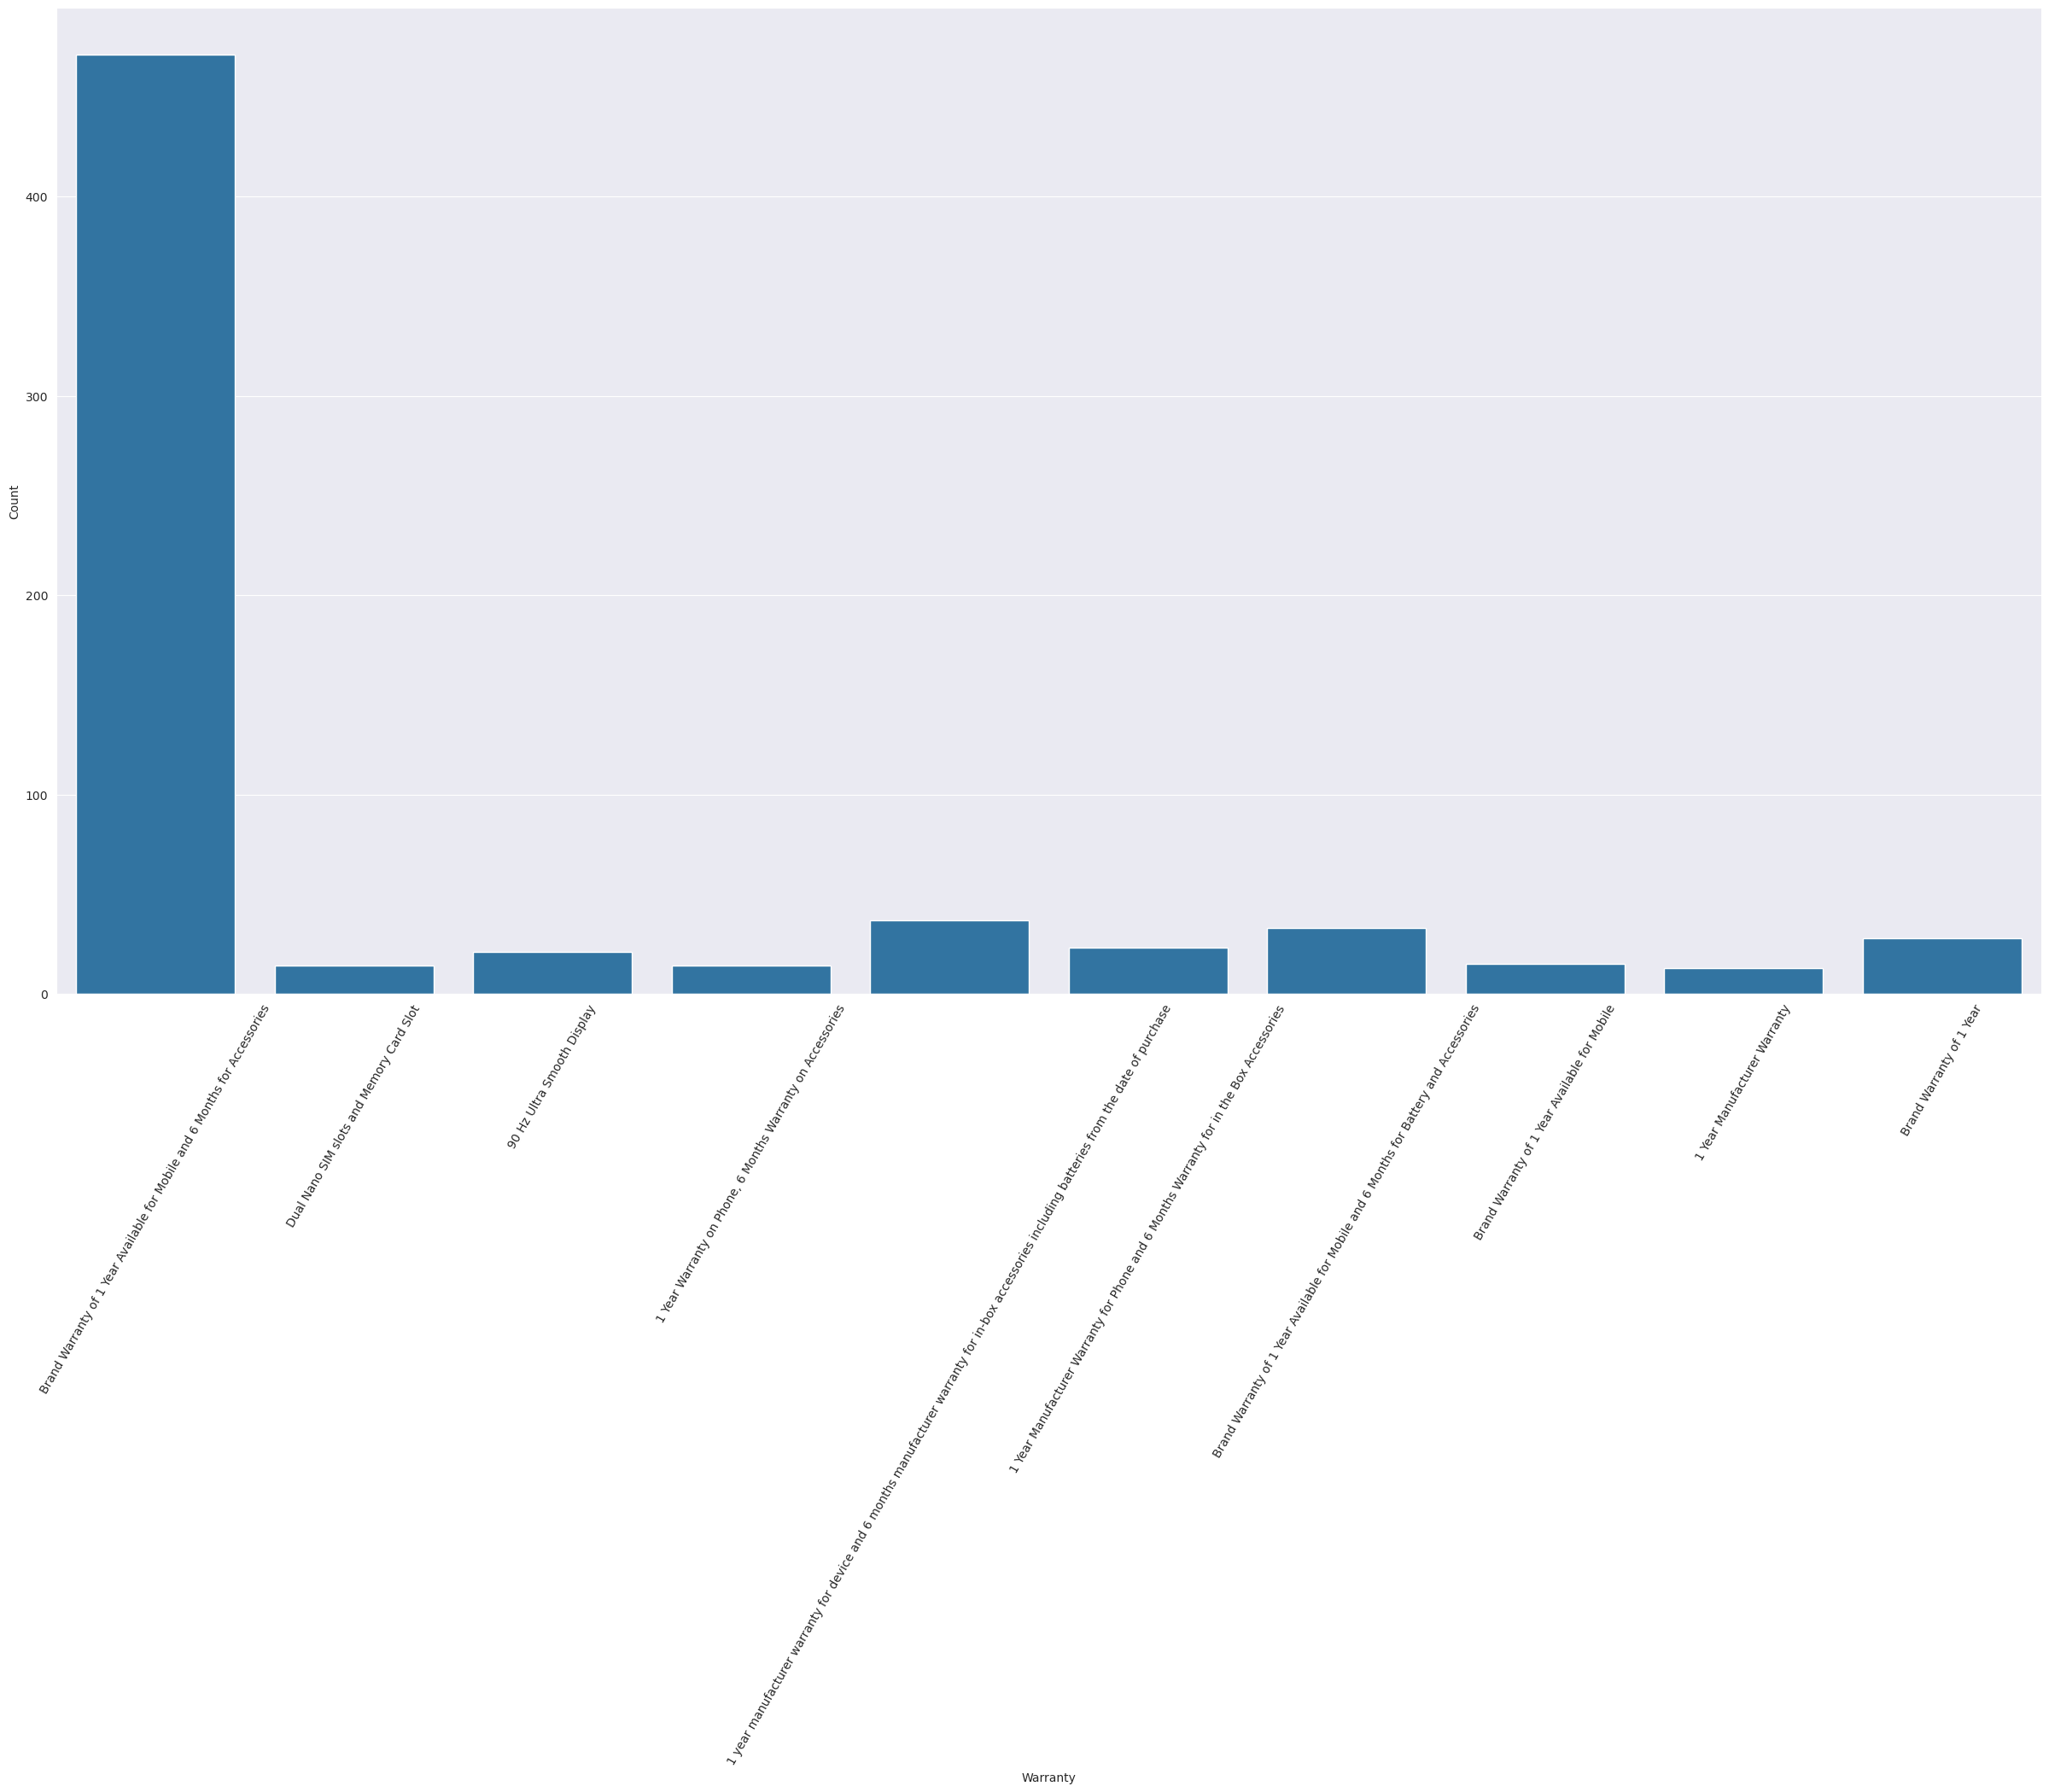

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
sns.countplot(x='warranty', data=filtered_mobiles)
plt.xticks(rotation=60)
plt.xlabel('Warranty')
plt.ylabel('Count')
plt.show()

In [60]:
from sklearn.impute import SimpleImputer
sip = SimpleImputer(strategy='most_frequent')
mobiles = sip.fit_transform(mobiles)

In [63]:
mobiles.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [65]:
mobiles.isnull().sum()

battery      0
camera       0
display      0
memory       0
name         0
price        0
processor    0
rating       0
reviews      0
warranty     0
dtype: int64

In [84]:
outlier_handles_mobile = cap_outliers(mobiles)

In [87]:
# sns.boxplot(x='price',data=mobiles)

def cap_outliers(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    group['price'] = np.where(group['price'] < lower_bound, lower_bound,np.where(group['price'] > upper_bound, upper_bound,group['price']))
    return group
q1 = mobiles['price'].quantile(0.25)
q3 = mobiles['price'].quantile(0.75)
iqr = q3-q1
mask2 = q3 + 1.5*iqr
mobile_filter_price = outlier_handles_mobile[outlier_handles_mobile['price'] > mask2]
# mobile_filter_price.head()
mobile_filter_price.info()
# print("The maximum price is : ",mask2)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   battery    0 non-null      object
 1   camera     0 non-null      object
 2   display    0 non-null      object
 3   memory     0 non-null      object
 4   name       0 non-null      object
 5   price      0 non-null      object
 6   processor  0 non-null      object
 7   rating     0 non-null      object
 8   reviews    0 non-null      object
 9   warranty   0 non-null      object
dtypes: object(10)
memory usage: 0.0+ bytes


<Axes: xlabel='price'>

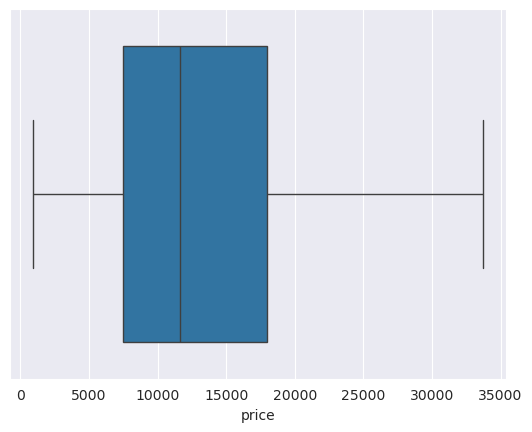

In [88]:
sns.boxplot(x=outlier_handles_mobile['price'], data=outlier_handles_mobile)

In [91]:
outlier_handles_mobile.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [97]:
outlier_handles_mobile['battery'] = outlier_handles_mobile.battery.str.extract(r'(\d+)')
outlier_handles_mobile['reviews'] = outlier_handles_mobile.reviews.str.extract(r'(\d+)')


In [99]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['battery', 'rating', 'reviews', 'price']
# Initialize the scaler
scaler = MinMaxScaler()
# Apply scaling
outlier_handles_mobile[numerical_cols] = scaler.fit_transform(outlier_handles_mobile[numerical_cols])
# Check scaled data
print(outlier_handles_mobile.head())


    battery                                     camera  \
0  0.791667              12MP + 2MP | 8MP Front Camera   
1  0.791667  12MP + 8MP + 2MP + 2MP | 8MP Front Camera   
2  0.791667  12MP + 8MP + 2MP + 2MP | 8MP Front Camera   
3  0.791667  12MP + 8MP + 2MP + 2MP | 8MP Front Camera   
4  0.583333              13MP + 2MP | 5MP Front Camera   

                            display  \
0   15.8 cm (6.22 inch) HD+ Display   
1  16.56 cm (6.52 inch) HD+ Display   
2  16.56 cm (6.52 inch) HD+ Display   
3  16.56 cm (6.52 inch) HD+ Display   
4   15.49 cm (6.1 inch) HD+ Display   

                                          memory  \
0  4 GB RAM | 64 GB ROM | Expandable Upto 512 GB   
1                           4 GB RAM | 64 GB ROM   
2                          4 GB RAM | 128 GB ROM   
3                          4 GB RAM | 128 GB ROM   
4  3 GB RAM | 32 GB ROM | Expandable Upto 256 GB   

                               name     price  \
0         Redmi 8 (Ruby Red, 64 GB)  0.277275   
1    

In [101]:
# type(outlier_handles_mobile)

pandas.core.frame.DataFrame

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,0.791667,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",0.277275,Qualcomm Snapdragon 439 Processor,0.772727,0.055332,Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
1,0.791667,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",0.307705,Qualcomm Snapdragon 665 2 GHz Processor,0.818182,0.020121,Sunrise Design
2,0.791667,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",0.338135,Qualcomm Snapdragon 665 (2 GHz) Processor,0.818182,0.020121,Sunrise Design
3,0.791667,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",0.338135,Qualcomm Snapdragon 665 (2 GHz) Processor,0.818182,0.020121,Sunrise Design
4,0.583333,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",0.201201,MediaTek P22 Octa Core 2.0 GHz Processor,0.772727,0.010060,Dual Nano SIM slots and Memory Card Slot
